<a href="https://colab.research.google.com/github/smlra-kjsce/ML-DL101/blob/master/PyTorch%20Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Tutorial
<ol>
<li><a href="https://pytorch.org/">What is PyTorch?</a></li>
<li><a href="https://pytorch.org/tutorials/">What can we do with it?</a></li>
<li><a href="https://www.google.com/url?sa=i&source=imgres&cd=&cad=rja&uact=8&ved=2ahUKEwjBsLzk6LTkAhXFfn0KHeZRApgQjRx6BAgBEAQ&url=https%3A%2F%2Fblog.algorithmia.com%2Fexploring-the-deep-learning-framework-pytorch%2F&psig=AOvVaw3eLYpoGyGHRVB5KUBSwjIN&ust=1567605789915136">What is a Computation Graph?</a></li>
<li>Looking at a detailed example of PyTorch Graph.</li>  
</ol>

##Installing PyTorch

In [0]:
!pip3 install torch torchvision
!pip3 install torchviz

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=12f353c1da7ce6b520a4b9e2d1fe0ec0a2b3f1048822dca9c27dc0a3b67648e0
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


##Importing all Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable
from math import pi
from copy import deepcopy
import torchviz

##Making Data
##Formula: mx + b + A1sin(w1x+c1) + A2sin(w2x+c2)

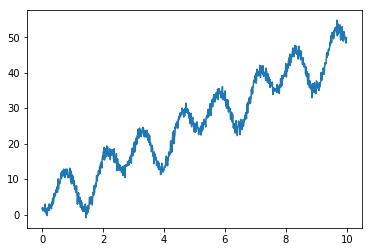

In [0]:
x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 2.5 * x + pi/3) - 5.2 * np.sin(5 * x + pi/5) + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

##How to compute a function in PyTorch


In [0]:
m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)
print(m)

tensor(1.2000, dtype=torch.float64, requires_grad=True)


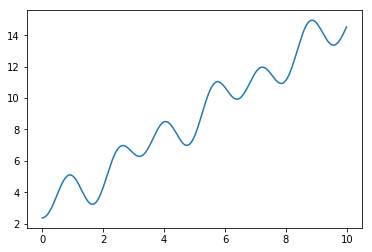

In [0]:
Y = m*x+b+A1*torch.sin(w1*x+c1)+A2*torch.sin(w2*x+c2)
plt.plot(x.detach().numpy(),Y.detach().numpy())

##Optimization in PyTorch

###Initialization

In [0]:
params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)
print(params[0])

tensor(1.2000, dtype=torch.float64, requires_grad=True)


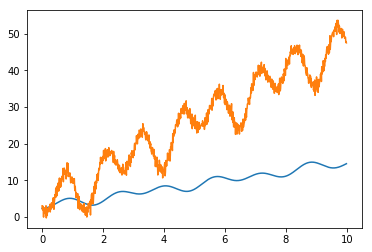

In [0]:
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])
plt.plot(x.detach().numpy(),Y.detach().numpy())
plt.plot(x.detach().numpy(),y.detach().numpy())

###Computing the Loss and Gradients!

In [0]:
# Initialize

params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)


In [0]:
# Compute the function
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum()
print(loss)

# Zero out the gradients
for i in params:
  if i.grad!=None:
    i.grad.data=torch.tensor(0.0,dtype=torch.double)

# Compute Gradients
loss.backward()
for i in params:
  print(i.grad)

NameError: ignored

###Updating the parameters

In [0]:
# Update Paramters
lr = 1e-5
for i in range(len(params)):
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)

for i in params:
  print(i)

tensor(2.3147, dtype=torch.float64, requires_grad=True)
tensor(2.9671, dtype=torch.float64, requires_grad=True)
tensor(0.6043, dtype=torch.float64, requires_grad=True)
tensor(2.1470, dtype=torch.float64, requires_grad=True)
tensor(0.7826, dtype=torch.float64, requires_grad=True)
tensor(-0.9869, dtype=torch.float64, requires_grad=True)
tensor(4.0582, dtype=torch.float64, requires_grad=True)
tensor(1.0562, dtype=torch.float64, requires_grad=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


##Complete Training Loop

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch:  0
Loss:  tensor(7042.9711, dtype=torch.float64, grad_fn=<SumBackward0>)


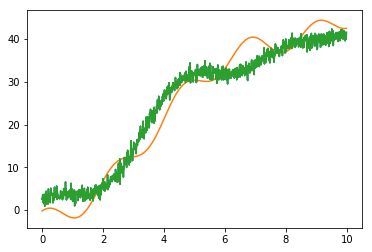

Epoch:  10000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


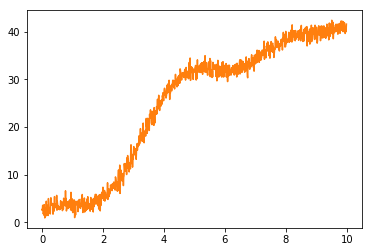

Epoch:  20000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


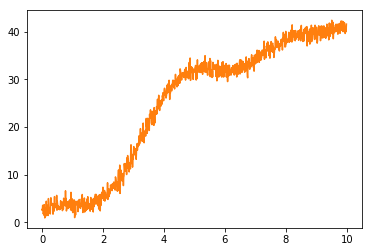

Epoch:  30000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


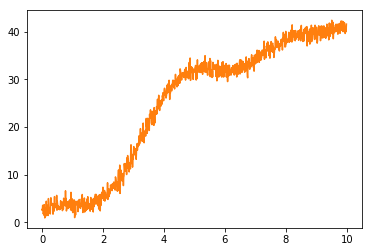

Epoch:  40000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


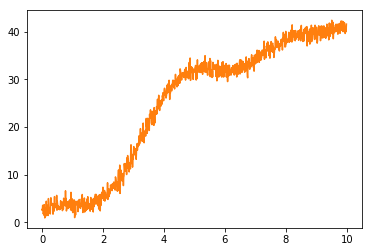

Epoch:  50000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


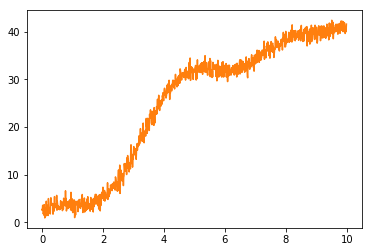

Epoch:  60000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


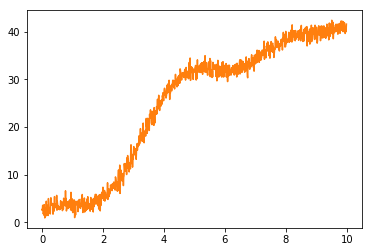

Epoch:  70000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


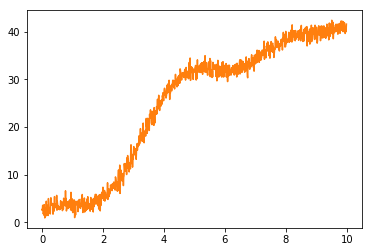

Epoch:  80000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


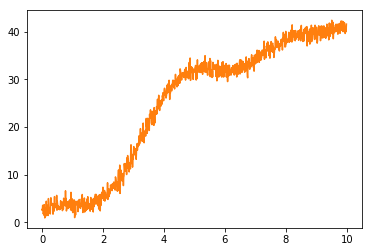

Epoch:  90000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


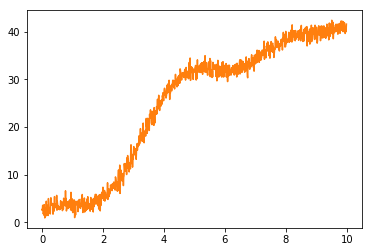

Epoch:  100000
Loss:  tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)


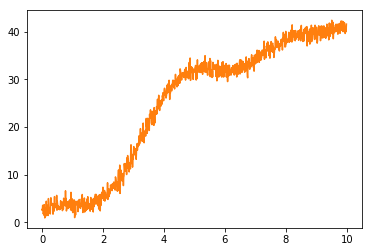

tensor(nan, dtype=torch.float64, requires_grad=True)
tensor(nan, dtype=torch.float64, requires_grad=True)
tensor(nan, dtype=torch.float64, requires_grad=True)
tensor(nan, dtype=torch.float64, requires_grad=True)
tensor(nan, dtype=torch.float64, requires_grad=True)
tensor(nan, dtype=torch.float64, requires_grad=True)
tensor(nan, dtype=torch.float64, requires_grad=True)
tensor(nan, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin(0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(5,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(0,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(2.7,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.9*pi,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(1.1*pi/3,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-5.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(0.23*pi,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(0.9*pi/5,dtype=torch.double),requires_grad=True)

lr = 1e-3

for epoch in range(100001):
  
  # Learning Rate Scheduling
  #lr = lr*0.99
  
  # Compute the function
  Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.sum()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Parameters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%10000==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

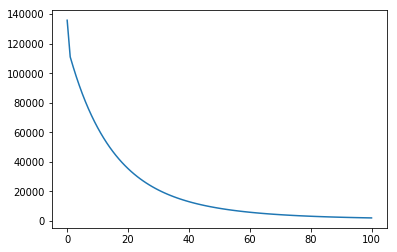

In [0]:
losses = np.array(losses)
plt.plot(losses)

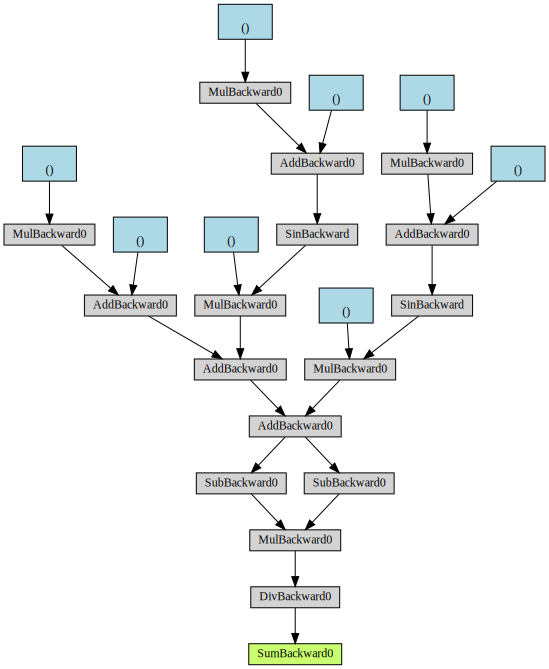

In [0]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)


x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(0,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(2.7,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.45*pi,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(1.1*pi/3,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-5.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(0.23*pi,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(0.9*pi/5,dtype=torch.double),requires_grad=True)

# Compute the function
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum()

make_dot(loss)